In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre = pd.read_csv("~/storage/data/physicists/pyhep2020-preworkshop-survey.csv")
post = pd.read_csv("~/storage/data/physicists/pyhep2020-postworkshop-survey.csv")

In [3]:
pre.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST',
 'PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST',
 'PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST',
 'PyHEP feedback: In what country do you currently reside?',
 'PyHEP feedback: How did you hear about this workshop?',
 'PyHEP feedback: Do you want to clarify how you found out about this workshop?',
 'PyHEP feedback: What are you hoping to learn from this workshop?',
 'PyHEP feedback: Do you want to clarify what you are hoping to learn from this workshop?',
 'Personal demographics: What best describes your gender?',
 'Personal demographics: What is your country of origin?',
 'Personal demographics: If you like, you may describe your race or ethnicity here.',
 'Professional life: What best describes your occupation?',
 'Professional life: Do you want to clarify your occupation?',
 'Professional life: What best des

In [4]:
post.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'Correlation with the pre-workshop survey: Did you submit a response to the pre-workshop survey?',
 'Correlation with the pre-workshop survey: In what country or continent do you currently reside?',
 'Correlation with the pre-workshop survey: What best describes the stage of your professional career?',
 'Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.',
 'Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
 'PyHEP 2020 content: How would you rate the level of the talks, relative to your expectations?',
 'PyHEP 2020 content: Which talks/topics were presented in a way that was too basic?',
 'PyHEP 2020 content: Which talks/topics were presented in a way that was too advanced?',
 'PyHEP 2020 content: How would you rate the variety of topics, relative to your expectations?',
 

In [5]:
post["try_correlation"] = (post['Correlation with the pre-workshop survey: Did you submit a response to the pre-workshop survey?'] == "Yes")

In [6]:
country_mapping_for_correlation = lambda x: {
    "Australia": "Anywhere else in the world",
    "Austria": "Anywhere else in Europe (including Russia)",
    "Belarus": "Anywhere else in Europe (including Russia)",
    "Belgium": "Anywhere else in Europe (including Russia)",
    "Brasil": "South America",
    "Brazil": "South America",
    "CH": "Switzerland",
    "Canada": "Anywhere else in North America",
    "Canada (Montreal)": "Anywhere else in North America",
    "Canada (east)": "Anywhere else in North America",
    "China": "Anywhere else in Asia",
    "Colombia": "South America",
    "Czech Rep.": "Anywhere else in Europe (including Russia)",
    "Czech Republic": "Anywhere else in Europe (including Russia)",
    "Czech republic": "Anywhere else in Europe (including Russia)",
    "Czechia": "Anywhere else in Europe (including Russia)",
    "Denmark": "Anywhere else in Europe (including Russia)",
    "EGYPT": "Anywhere else in the world",
    "Ecuador": "South America",
    "Egypt": "Anywhere else in the world",
    "Finland": "Anywhere else in Europe (including Russia)",
    "France": "France",
    "France (CERN-based)": "France",
    "Germany": "Germany",
    "Greece": "Anywhere else in Europe (including Russia)",
    "Greeve": "Anywhere else in Europe (including Russia)",
    "Honduras": "South America",
    "Hungary": "Anywhere else in Europe (including Russia)",
    "INDIA": "India",
    "India": "India",
    "Indonesia": "Anywhere else in Asia",
    "Iran": "Anywhere else in Asia",
    "Italy": "Italy",
    "Japan": "Anywhere else in Asia",
    "Kuwait": "Anywhere else in the world",
    "MEXICO": "Anywhere else in North America",
    "Mexico": "Anywhere else in North America",
    "México": "Anywhere else in North America",
    "Netherlands": "Anywhere else in Europe (including Russia)",
    "Netherlands. Time slot also dependent on another conference. So need to be able to attend both.": "Anywhere else in Europe (including Russia)",
    "Oman": "Anywhere else in the world",
    "Osaka, Japan": "Anywhere else in Asia",
    "PHILIPPINES": "Anywhere else in Asia",
    "Pakistan": "Anywhere else in the world",
    "Peru": "South America",
    "Philippines": "Anywhere else in Asia",
    "Poland": "Anywhere else in Europe (including Russia)",
    "Portugal": "Anywhere else in Europe (including Russia)",
    "Republic of Korea": "Anywhere else in Asia",
    "Romania": "Anywhere else in Europe (including Russia)",
    "Russia": "Anywhere else in Europe (including Russia)",
    "Russia Federation": "Anywhere else in Europe (including Russia)",
    "S.KOREA": "Anywhere else in Asia",
    "Slovenia": "Anywhere else in Europe (including Russia)",
    "South Africa": "Anywhere else in the world",
    "South Korea": "Anywhere else in Asia",
    "Spain": "Anywhere else in Europe (including Russia)",
    "Stockholm": "Anywhere else in Europe (including Russia)",
    "Switzerland": "Switzerland",
    "Taiwan": "Anywhere else in Asia",
    "Taiwan (R.O.C.)": "Anywhere else in Asia",
    "Thailand": "Anywhere else in Asia",
    "The Netherlands": "Anywhere else in Europe (including Russia)",
    "U.S.": "United States",
    "U.S.A.": "United States",
    "UK": "United Kingdom",
    "US": "United States",
    "US (EST)": "United States",
    "USA": "United States",
    "USA (Chicago)": "United States",
    "USA - Michigan": "United States",
    "Ukraine": "Anywhere else in Europe (including Russia)",
    "United Kingdom": "United Kingdom",
    "United State": "United States",
    "United States": "United States",
    "United States of America": "United States",
    "United Status": "United States",
    "france": "France",
    "greece": "Anywhere else in Europe (including Russia)",
    "india": "India",
    "iran": "Anywhere else in the world",
    "italy": "Italy",
    "morocco": "Anywhere else in the world",
    "poland": "Anywhere else in Europe (including Russia)",
    "switzerland": "Switzerland",
    "the U.S": "United States",
}.get(x, " ")
pre["correlate_country"] = pre[['PyHEP feedback: In what country do you currently reside?']].fillna("").applymap(country_mapping_for_correlation).iloc[:, 0]
post["correlate_country"] = post['Correlation with the pre-workshop survey: In what country or continent do you currently reside?'].fillna("")

In [7]:
professional_stage_mapping_for_correlation = lambda x: {
    "Early grad student (mostly taking courses)": "Student",
    "Grad student involved in research": "Student",
    "High school student": "Student",
    "Undergraduate student": "Student",
    "Postdoc/fellow/temporary research position": "Postdoc/fellow/temporary research position",
    "Professor at a college or university": "Professor at a college or university",
    "In a career outside of particle physics": "Other",
    "Other, not listed above": "Other",
    "Research or management at a laboratory/college/university": "Other",
    "Retired/emeritus": "Other",
}.get(x, " ")
pre["correlate_professional_stage"] = pre[['Professional life: What best describes the stage of your professional career?']].fillna("").applymap(professional_stage_mapping_for_correlation).iloc[:, 0]
post["correlate_professional_stage"] = post['Correlation with the pre-workshop survey: What best describes the stage of your professional career?'].fillna("")

In [8]:
operating_system_mapping_for_correlation = lambda x: {
    "Linux": "Linux",
    "Linux; None (e.g. VT520)": "Linux",
    "Linux; Other UNIX-like (e.g. FreeBSD)": "Linux",
    "MacOS": "MacOS",
    "MacOS; Linux": "MacOS; Linux",
    "Windows": "Windows",
    "Windows; Linux": "Windows; Linux",
    "Windows; Linux; I don't know": "Windows; Linux",
    "Windows; MacOS": "Windows; MacOS",
    "Windows; MacOS; Linux": "Windows; MacOS; Linux",
    "Windows; MacOS; Linux; Other UNIX-like (e.g. FreeBSD)": "Windows; MacOS; Linux",
}.get(x, " ")
pre["correlate_operating_system"] = pre[['Computing and programming: What operating system(s) does it run?']].fillna("").applymap(operating_system_mapping_for_correlation).iloc[:, 0]
post["correlate_operating_system"] = post['Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.'].fillna("")

In [9]:
editor_mapping_for_correlation = lambda x: " " if x == "" else "; ".join(sorted(
    [y if y in [
        "Atom",
        "Emacs (or variant: XEmacs, Aquamacs, Carbon Emacs)",
        "Jupyter/JupyterLab",
        "Notepad or Notepad++",
        "pico or nano",
        "PyCharm",
        "Sublime Text",
        "Vi or Vim",
        "Visual Studio",
        "VSCode",
        "XCode",
    ] else "Other" for y in x.split("; ")],
))
pre["correlate_editor"] = pre[['Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?']].fillna("").applymap(editor_mapping_for_correlation).iloc[:, 0]
editor_mapping_for_correlation2 = lambda x: "; ".join(sorted([y for y in x.split("; ")]))
post["correlate_editor"] = post[['Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?']].fillna("").applymap(editor_mapping_for_correlation2).iloc[:, 0]

In [10]:
pre_indexed = pre.set_index(["correlate_country", "correlate_professional_stage", "correlate_operating_system", "correlate_editor"])
post_indexed = post[post["try_correlation"]].set_index(["correlate_country", "correlate_professional_stage", "correlate_operating_system", "correlate_editor"])

In [11]:
correlated = pd.merge(pre_indexed, post_indexed, how="right", left_index=True, right_index=True)
correlated = correlated[~pd.isna(correlated['PyHEP feedback: In what country do you currently reside?'])]
correlated = correlated[~pd.isna(correlated['Professional life: What best describes the stage of your professional career?'])]
correlated = correlated[~pd.isna(correlated['Computing and programming: What operating system(s) does it run?'])]
correlated = correlated[~pd.isna(correlated['Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?'])]

In [12]:
len(post), len(post_indexed), len(correlated)

(179, 151, 59)

In [13]:
# correlated[[
#     "correlate_country",
#     'PyHEP feedback: In what country do you currently reside?',
#     'Correlation with the pre-workshop survey: In what country or continent do you currently reside?',
# ]]

In [14]:
# correlated[[
#     "correlate_professional_stage",
#     'Professional life: What best describes the stage of your professional career?',
#     'Correlation with the pre-workshop survey: What best describes the stage of your professional career?',
# ]]

In [15]:
# correlated[[
#     "correlate_operating_system",
#     'Computing and programming: What operating system(s) does it run?',
#     'Correlation with the pre-workshop survey: What operating system(s) run on the computer you most often use for work? Check all that apply.'
# ]]

In [16]:
# correlated[[
#     'Computing and programming: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
#     'Correlation with the pre-workshop survey: Which text editors/IDEs do you use regularly (i.e. more than 10% of your work)?',
# ]]

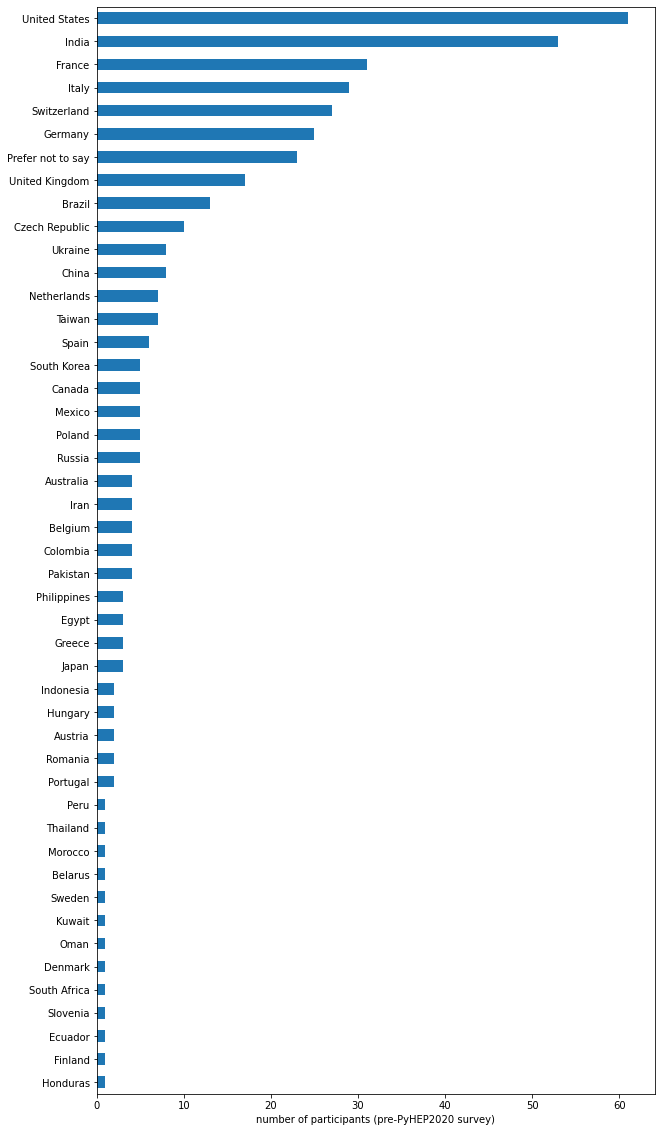

In [67]:
def fix_country_names(name):
    name = " ".join(x.capitalize() for x in str(name).strip(" '\"").split())
    name = {
        "Brasil": "Brazil",
        "Canada (east)": "Canada",
        "Canada (montreal)": "Canada",
        "Ch": "Switzerland",
        "Czech Rep.": "Czech Republic",
        "Czechia": "Czech Republic",
        "France (cern-based)": "France",
        "Greeve": "Greece",
        "México": "Mexico",
        "Netherlands. Time Slot Also Dependent On Another Conference. So Need To Be Able To Attend Both.": "Netherlands",
        "Osaka, Japan": "Japan",
        "Republic Of Korea": "South Korea",
        "Russia Federation": "Russia",
        "S.korea": "South Korea",
        "Stockholm": "Sweden",
        "Taiwan (r.o.c.)": "Taiwan",
        "The Netherlands": "Netherlands",
        "The U.s": "United States",
        "Uk": "United Kingdom",
        "U.s.": "United States",
        "U.s.a.": "United States",
        "United State": "United States",
        "Us": "United States",
        "Us (est)": "United States",
        "Usa": "United States",
        "Usa (chicago)": "United States",
        "Usa - Michigan": "United States",
        "United States Of America": "United States",
        "United Status": "United States",
        "Nan": "Prefer not to say",
    }.get(name, name)
    return name
pre[["PyHEP feedback: In what country do you currently reside?"]].applymap(fix_country_names).iloc[:, 0].value_counts(ascending=True).plot.barh(figsize=(10, 20))
plt.xlabel("number of participants (pre-PyHEP2020 survey)");

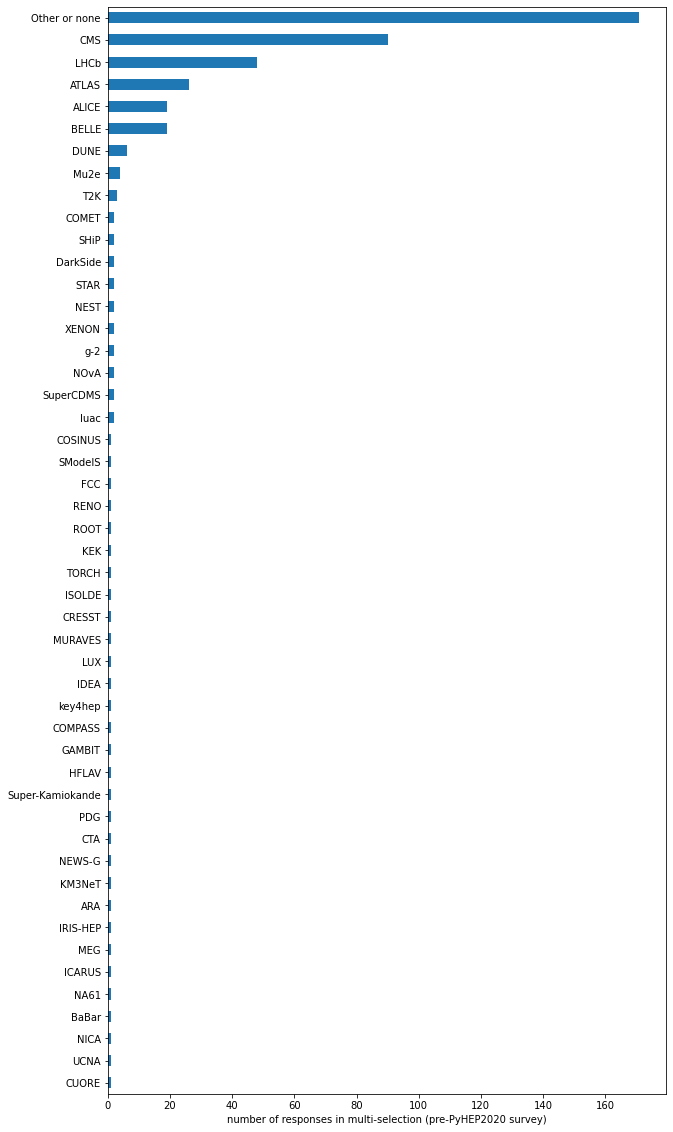

In [68]:
fix_collaboration_names = lambda x: {
    "alice": "ALICE",
    "Alice": "ALICE",
    "ALICE": "ALICE",
    "ALICE member": "ALICE",
    "ATLAS": "ATLAS",
    "ATLAS, BELLE2": "ATLAS;BELLE",
    "ATLAS, Darkside": "ATLAS;DarkSide",
    "ATLAS, FCC, IDEA": "ATLAS;FCC;IDEA",
    "ATLAS, IRIS-HEP": "ATLAS;IRIS-HEP",
    "ATLAS, KM3NeT": "ATLAS;KM3NeT",
    "BaBar, HFLAV, PDG, LHCb, FNAL-E989": "BaBar;HFLAV;PDG;LHCb;g-2",
    "Belle": "BELLE",
    "BELLE": "BELLE",
    "Belle2": "BELLE",
    "Belle, ARA": "BELLE;ARA",
    "Belle / Belle II": "BELLE",
    "Belle, Belle II": "BELLE",
    "belle II": "BELLE",
    "Belle II": "BELLE",
    "Belle II and GAMBIT": "BELLE;GAMBIT",
    "Belle II, CMS": "BELLE;CMS",
    "BELLE I & II": "BELLE",
    "BNL-STAR collaboration": "STAR",
    "cms": "CMS",
    "Cms": "CMS",
    "CMS": "CMS",
    "CMS, ALICE": "CMS;ALICE",
    "CMS, DUNE": "CMS;DUNE",
    "CMS Experiment": "CMS",
    "CMS, SModelS": "CMS;SModelS",
    "COMET": "COMET",
    "COMET MEG": "COMET;MEG",
    "COMPASS": "COMPASS",
    "CRESST, COSINUS": "CRESST;COSINUS",
    "CUORE/CUPID": "CUORE",
    "DarkSide": "DarkSide",
    "DUNE": "DUNE",
    "DUNE (SAND), NICA": "DUNE;NICA",
    "I am currently associated with Belle and Belle 2 experiments.": "BELLE",
    "I am in a team that they are in collaboration with CMS and I am going to join in a CERN group.": "CMS",
    "ICARUS and DUNE": "ICARUS;DUNE",
    "I'm associated with CMS experiment": "CMS",
    "ISOLDE": "ISOLDE",
    "Iuac": "Iuac",
    "Just switched from CMS to CTA": "CTA",
    "KEK": "KEK",
    "key4hep": "key4hep",
    "lhcb": "LHCb",
    "LHCb": "LHCb",
    "LHCb SHiP": "LHCb;SHiP",
    "LHCb, SHiP": "LHCb;SHiP",
    "LHCb, TORCH": "LHCb;TORCH",
    "LUX, NEST": "LUX;NEST",
    "Mu2e": "Mu2e",
    "Mu2e, a few small instrumentation efforts outside Mu2e": "Mu2e",
    "Mu2e, Muon g-2": "Mu2e;g-2",
    "Mu2e, NEWS-G": "Mu2e;NEWS-G",
    "MUon RAdiography of Mt VESuvius (MURAVES)": "MURAVES",
    "NA61/SHINE Experiment": "NA61",
    "NOvA": "NOvA",
    "NOvA, DUNE": "NOvA;DUNE",
    "RENO,BELLE2, etc": "RENO;BELLE",
    "ROOT": "ROOT",
    "STAR": "STAR",
    "SuperCDMS": "SuperCDMS",
    "Super CDMS": "SuperCDMS",
    "Super-Kamiokande, T2K, DUNE": "Super-Kamiokande;T2K;DUNE",
    "T2K": "T2K",
    "UCNA": "UCNA",
    "XENON (direct dark matter search)": "XENON",
    "XENON    NEST": "XENON;NEST",
    "Yes. Belle and Belle II": "BELLE",
    "Yes, Belle II collaboration. :)": "BELLE",
    "yes, CMS": "CMS",
    "Yes: CMS": "CMS",
    "Yes, with ATLAS.": "ATLAS",
}.get(x, "Other or none")
pd.DataFrame(pre[
    ["Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)"]
].applymap(fix_collaboration_names).iloc[:, 0].str.split(";").tolist()).stack().value_counts(ascending=True).plot.barh(figsize=(10, 20))
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)");

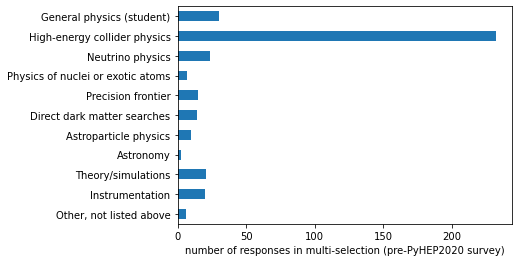

In [65]:
options = [
    "General physics (student)",
    "High-energy collider physics",
    "Neutrino physics",
    "Physics of nuclei or exotic atoms",
    "Precision frontier",
    "Direct dark matter searches",
    "Astroparticle physics",
    "Astronomy",
    "Theory/simulations",
    "Instrumentation",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if option in responses else 0.0 for option in options]
exploded = pre[["Professional life: If you're involved in physics, what area(s) do you study?"]].fillna("").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=options)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh()
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)");

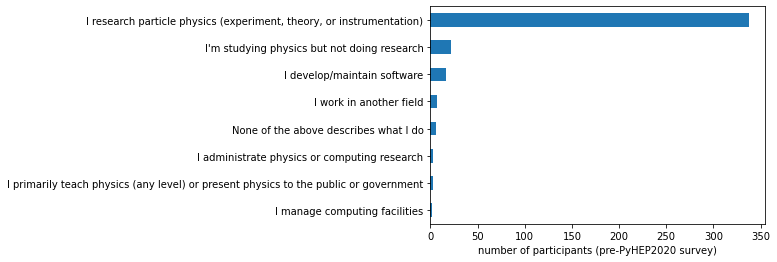

In [64]:
pre["Professional life: What best describes your occupation?"].value_counts(ascending=True).plot.barh()
plt.xlabel("number of participants (pre-PyHEP2020 survey)");

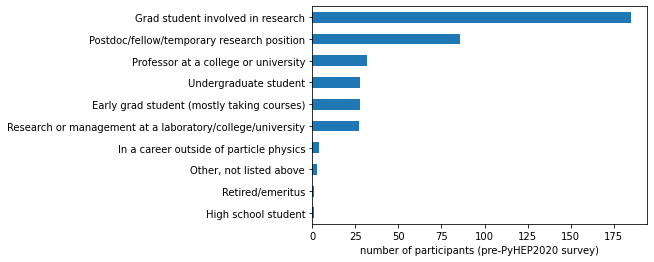

In [63]:
pre["Professional life: What best describes the stage of your professional career?"].value_counts(ascending=True).plot.barh()
plt.xlabel("number of participants (pre-PyHEP2020 survey)");

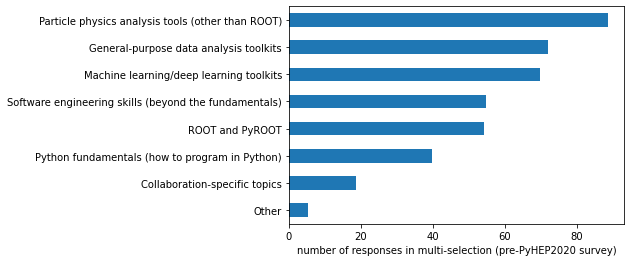

In [61]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = pre[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh()
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)");

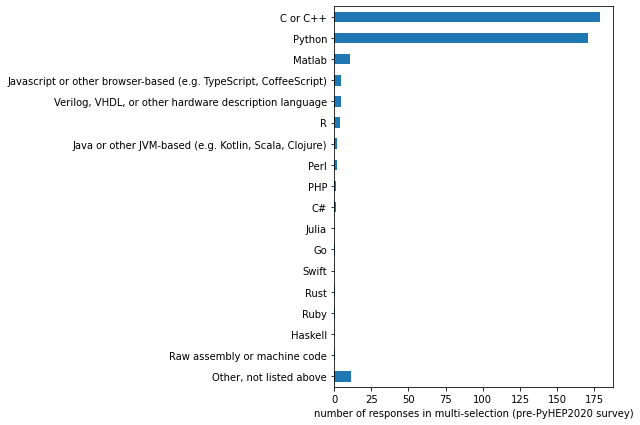

In [60]:
languages = [
    "C or C++",
    "Python",
    "Matlab",
    "Javascript or other browser-based (e.g. TypeScript, CoffeeScript)",
    "Verilog, VHDL, or other hardware description language",
    "R",
    "Java or other JVM-based (e.g. Kotlin, Scala, Clojure)",
    "Perl",
    "PHP",
    "C#",
    "Julia",
    "Go",
    "Swift",
    "Rust",
    "Ruby",
    "Haskell",
    "Raw assembly or machine code",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if language in responses else 0.0 for language in languages]
exploded = pre[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("").applymap(explode)
indicator = pd.DataFrame(exploded.iloc[:, 0].tolist(), columns=languages)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7))
plt.xlabel("number of responses in multi-selection (pre-PyHEP2020 survey)");

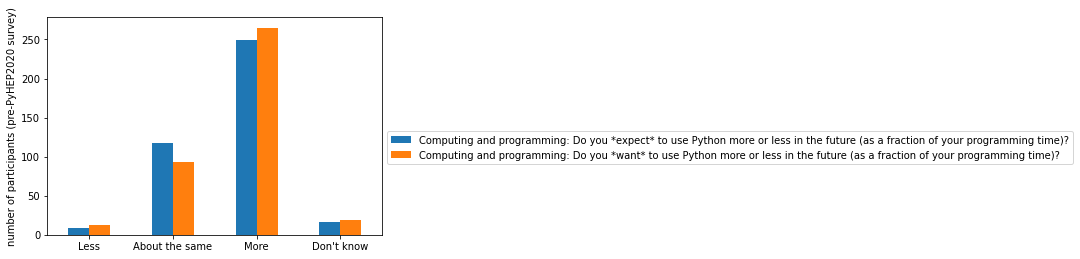

In [57]:
pre[[
    "Computing and programming: Do you *expect* to use Python more or less in the future (as a fraction of your programming time)?",
    "Computing and programming: Do you *want* to use Python more or less in the future (as a fraction of your programming time)?"
]].apply(pd.Series.value_counts).loc[["Less", "About the same", "More", "Don't know"]].plot.bar(rot=0).legend(bbox_to_anchor=(1.0, 0.5))
plt.ylabel("number of participants (pre-PyHEP2020 survey)");

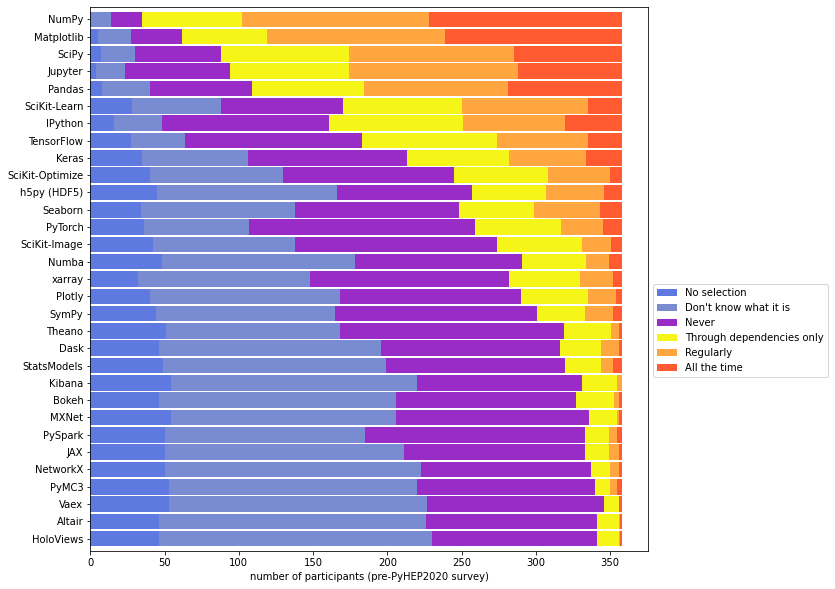

In [54]:
cols = {x: x.split(":")[1].strip() for x in pre.columns if x.startswith("Python ecosystem:") and "?" not in x}
order = ((pre[list(cols)] == "Don't know what it is") | (pre[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = pre[order].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 10), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.0, 0.5))
plt.xlabel("number of participants (pre-PyHEP2020 survey)");

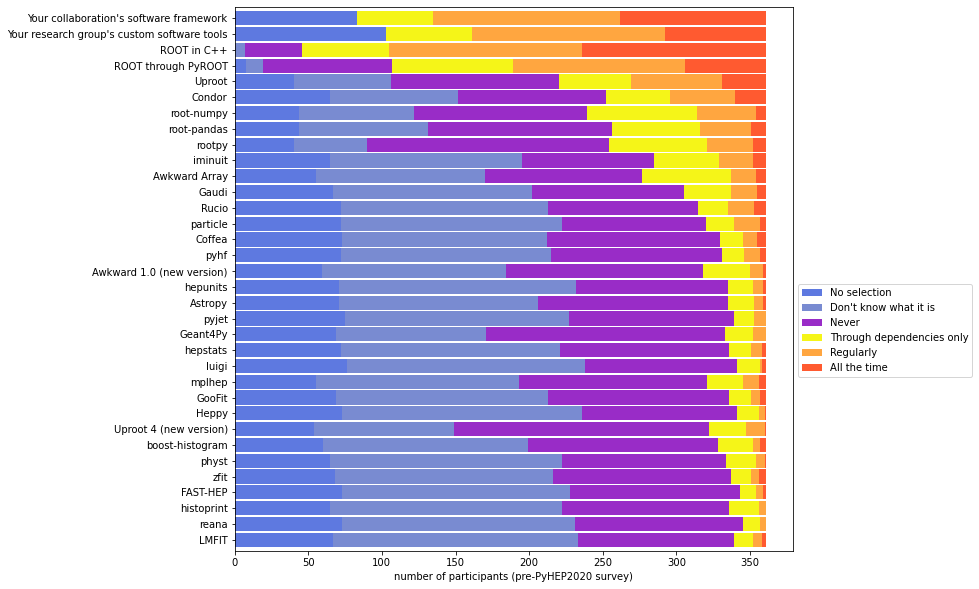

In [55]:
cols = {x: x.split(":")[1].strip() for x in pre.columns if x.startswith("Particle physics ecosystem:") and "?" not in x}
order = ((pre[list(cols)] == "Don't know what it is") | (pre[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = pre[order].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 10), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"]).legend(bbox_to_anchor=(1.0, 0.5))
plt.xlabel("number of participants (pre-PyHEP2020 survey)");